<a href="https://colab.research.google.com/github/phamdinhthuc020100/AIProject-SEARCH/blob/main/Handwritten_Digit_Recognition_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(X_train_org, y_train_org), (X_test_org, y_test_org) = mnist.load_data()
X_train_org.shape, X_test_org.shape 

((60000, 28, 28), (10000, 28, 28))

1

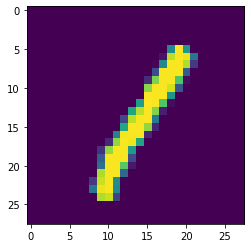

In [3]:
plt.imshow(X_train_org[23])
y_train_org[23]

In [4]:
# gray_image (D = 1), RGB (D = 3)
X_train = X_train_org.reshape(60000, 28, 28, 1)
X_test = X_test_org.reshape(10000, 28, 28, 1)  

In [5]:
# one-hot encode target column
y_train = to_categorical(y_train_org)
y_test = to_categorical(y_test_org)

In [6]:
# Build Model
model = Sequential()

# add model layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
____________________________________________________

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2728 - accuracy: 0.9424 - val_loss: 0.0642 - val_accuracy: 0.9782
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.0612 - val_accuracy: 0.9816
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0477 - val_accuracy: 0.9849


In [9]:
y_hat = model.predict(X_test)
y_hat = np.argmax(y_hat, axis = 1)
y_hat

array([7, 2, 1, ..., 4, 5, 6])

3

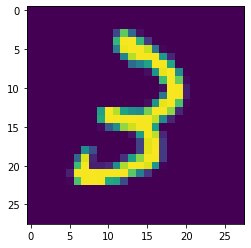

In [15]:
# Test 
plt.imshow(X_test_org[63])
y_hat[63]